In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

### Implementing Linear Regression Class

In [ ]:
class LinearRegression:
    def __init__(self):
        self.weights=None
        self.bias=None

    def mse_loss(self,y,y_pred):
        '''calculate mean squared error'''
        loss=np.sum((y_pred-y)**2)
        return loss/y.shape[0]
    
    def r2_score(self,y,y_pred):
        ''' r2_score is useful metric for regression
            it is defined as 1-((y-y_pred)/(y-y.mean()))^2'''
        num=np.sum((y-y_pred)**2)
        dem=np.sum((y-y.mean())**2)
        return 1-(num/dem)

    def gradients(self,X,y,y_pred):
        grad_w=np.dot(X.T,(y_pred-y))/X.shape[0]
        grad_b=np.sum(y_pred-y)/X.shape[0]
        return (grad_w,grad_b)

    def gradient_descent(self,grad_w,grad_b,lr):
        self.weights-=(lr*grad_w)
        self.bias-=(lr*grad_b)

    def train(self,X,y,lr=0.001,epochs=100):
        '''X: data features an (m,n) shape numpy array,
              where m= number of examples, n= number of features
           y: data label a (n,1) shaped vector
           lr: learning rate
           epochs: number of times training loop should run'''
        self.weights=np.zeros(X.shape[1])
        self.bias=0
        losses=[]
        scores=[]
        for i in range(epochs):
            y_pred=np.dot(X,self.weights)+self.bias
            loss=self.mse_loss(y,y_pred)
            score=self.r2_score(y,y_pred)
            losses.append(loss)
            scores.append(score)
            grad_w,grad_b=self.gradients(X,y,y_pred)
            self.gradient_descent(grad_w,grad_b,lr)
            print("loss={} r2_score={}".format(loss,score))
        plt.plot(losses,label='mse_loss',c='r')
        plt.legend()
        plt.show()
        plt.plot(scores,label='r2_score',c='b')
        plt.legend()
        plt.show()

    def predict(self,X_test):
        ''' X_test: test features m,n dimesional numpy array'''
        return np.dot(X_test,self.weights)+self.bias

### Loading Boston House Price dataset present in sklearn library

In [ ]:
X,y=load_boston(return_X_y=True)

### train test split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=4/23,random_state=12)

In [ ]:
print(len(X_train),len(X_test))

418 88


### normalization

In [ ]:
mean=X.mean(axis=0)
std=X.std(axis=0)

In [ ]:
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std

### training and testing

In [ ]:
lin=LinearRegression()

loss=586.8010765550239 r2_score=-6.005337093750373
loss=545.1632450277657 r2_score=-5.508257150724947
loss=508.8177804609088 r2_score=-5.074358439061766
loss=476.4964079193755 r2_score=-4.688500063825986
loss=447.3287488012876 r2_score=-4.340291288277416
loss=420.70958385547067 r2_score=-4.022506895831596
loss=396.21090722954807 r2_score=-3.7300372754230553
loss=373.5236260107848 r2_score=-3.459192420108198
loss=352.4188828940703 r2_score=-3.207240190099414
loss=332.7223696890703 r2_score=-2.9720996627803715
loss=314.2972426494701 r2_score=-2.7521371728249333
loss=297.03273502370706 r2_score=-2.546030366773849
loss=280.83654450048306 r2_score=-2.3526773229861893
loss=265.6297232223758 r2_score=-2.1711355477001515
loss=251.3432281708889 r2_score=-2.000580792907574
loss=237.91557436504638 r2_score=-1.8402790398154658
loss=225.29122168035747 r2_score=-1.6895672403998327
loss=213.41945075321675 r2_score=-1.5478398977496566
loss=202.2535659378926 r2_score=-1.4145395508236573
loss=191.750317

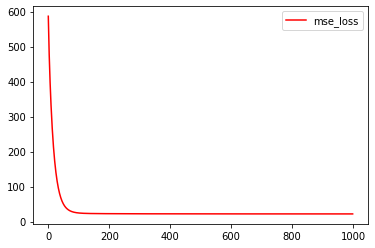

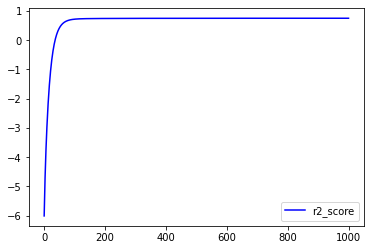

In [ ]:
lin.train(X_train,y_train,lr=0.03,epochs=1000)

In [ ]:
print('mean squared error loss={},r2_score={}'.format(lin.mse_loss(y_test,lin.predict(X_test)),lin.r2_score(y_test,lin.predict(X_test))))

mean squared error loss=22.410137640866164,r2_score=0.743097384570212
